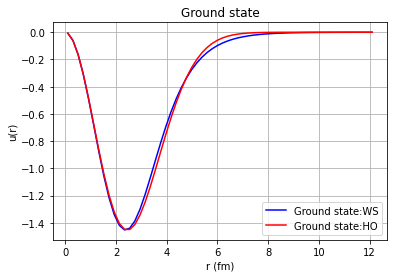

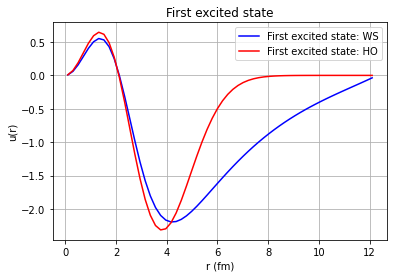

In [17]:
#MY TRY

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import genlaguerre

N_r = 60
r_max = 12.0

h = r_max / (N_r - 1)

r = h / 2 + h * np.arange(N_r)

#Wood-Saxon Potential

N = 8
Z = 8
A = N + Z
a = 0.67
hsq2m = 20.73
V0 = 51.0
l = 0


#constants 
m = 938.92

def V_WS(r):
    R_ws = 1.27 * A**(1 / 3)
    V_ws = -V0 - 33.0 * (N - Z) / A  # Plus for neutrons, minus for protons
    return V_ws / (1 + np.exp((r - R_ws) / a))

def centrifugal(r, l):
    return hsq2m * l * (l + 1) / r**2

#Effective potential matrix

V_eff = np.zeros((N_r, N_r))

for i in range(N_r):
    V_eff[i, i] = V_WS(r[i]) + centrifugal(r[i], l)


#Kinetic energy matrix

T = np.zeros((N_r, N_r))

for i in range(N_r):
    for j in range(N_r):
        if i == j:
            T[i, j] = -2.0
        elif abs(i - j) == 1:
            T[i, j] = 1.0


#boundaries

T[0, 0] = -3.0 if l % 2 == 0 else -1.0
T[0, 1] = 1.0

#scaling

T = (-hsq2m / h**2) * T

#Hamiltonian

H = T + V_eff

#Eigenvalues and eigenvectors

E, psi = np.linalg.eigh(H)

#keep only bound states

E = E[E < 0]
psi = psi[:,:len(E)]

#Normalization

for i in range(len(E)):
    psi[:, i] /= np.sqrt(h * np.sum(psi[:, i]**2))

#transition to u(r)

u = np.zeros((N_r, len(E)))

for i in range(len(E)):
    u[:, i] = r * psi[:, i]

#plot the first and second bound states on seperate plots






#_______________________________________________________________________________________
#HARMONIC OSCILLATOR using a created matrix

def V_HO(r,omega):
    return 0.5 * m * omega**2 * r**2

omega = .07

V_eff_HO = np.zeros((N_r, N_r))

for i in range(N_r):
    V_eff_HO[i, i] = V_HO(r[i],omega) + centrifugal(r[i], l)

H_HO = T + V_eff_HO

E_HO, psi_HO = np.linalg.eigh(H_HO)

# E_HO = E_HO[E_HO < 0]

# psi_HO = psi_HO[:,:len(E_HO)]

for i in range(len(E_HO)):
    psi_HO[:, i] /= np.sqrt(h * np.sum(psi_HO[:, i]**2))

u_HO = np.zeros((N_r, len(E_HO)))

for i in range(len(E_HO)):
    u_HO[:, i] = r * psi_HO[:, i]

plt.figure()
plt.plot(r, u[:, 0], label = 'Ground state:WS',color='blue')
plt.plot(r, u_HO[:, 0], label = 'Ground state:HO',color='red')
plt.xlabel('r (fm)')
plt.ylabel('u(r)')
plt.title('Ground state')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(r, u[:, 1], label = 'First excited state: WS', color="blue")
plt.plot(r, u_HO[:, 1], label = 'First excited state: HO', color="red")
plt.xlabel('r (fm)')
plt.ylabel('u(r)')
plt.title('First excited state')
plt.legend()
plt.grid()
plt.show()



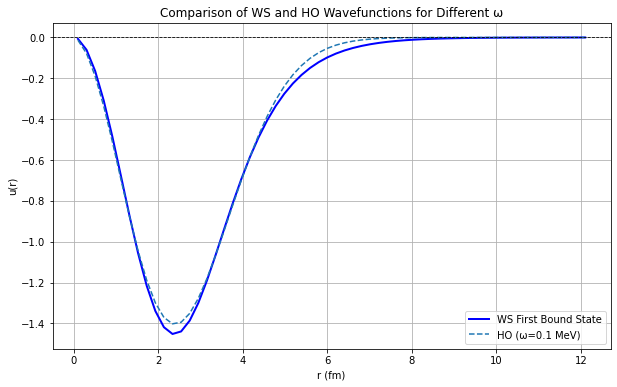

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 938.92  # Mass in MeV/c^2
hsq2m = 20.73  # MeV·fm^2
N_r = 60
r_max = 12.0
h = r_max / (N_r - 1)
r = h / 2 + h * np.arange(N_r)

# Woods-Saxon Potential (already computed)
# u[:, 0] represents the first WS bound state

# Function for the HO potential
def V_HO(r, omega):
    return 0.5 * m * omega**2 * r**2

# Function to compute the HO wavefunctions for a given omega
def compute_ho_wavefunction(omega, T, l):
    # Construct the HO potential matrix
    V_eff_HO = np.zeros((N_r, N_r))
    for i in range(N_r):
        V_eff_HO[i, i] = V_HO(r[i], omega)

    # Hamiltonian: Kinetic + Potential
    H_HO = T + V_eff_HO

    # Diagonalize Hamiltonian
    E_HO, psi_HO = np.linalg.eigh(H_HO)

    # Normalize wavefunctions
    for i in range(len(E_HO)):
        psi_HO[:, i] /= np.sqrt(h * np.sum(psi_HO[:, i]**2))

    # Compute reduced wavefunction u(r) = r * psi(r)
    u_HO = np.zeros((N_r, len(E_HO)))
    for i in range(len(E_HO)):
        u_HO[:, i] = r * psi_HO[:, i]

    return u_HO[:, 0]  # Return the ground state (n=0) reduced wavefunction

# Kinetic energy matrix (constant for all omegas)
T = np.zeros((N_r, N_r))
for i in range(N_r):
    for j in range(N_r):
        if i == j:
            T[i, j] = -2.0
        elif abs(i - j) == 1:
            T[i, j] = 1.0
T = (-hsq2m / h**2) * T

# List of omegas to test
# omega_list = np.linspace(.01, 1.0, 100)  # Test omegas from 1.0 to 5.0 MeV
omega_list = [.07]

# Plot the first Woods-Saxon bound state
plt.figure(figsize=(10, 6))
plt.plot(r, u[:, 0], label="WS First Bound State", color="blue", linewidth=2)

# Compute and plot HO wavefunctions for each omega
for omega in omega_list:
    u_HO_0 = compute_ho_wavefunction(omega, T, l=0)
    plt.plot(r, u_HO_0, label=f"HO (ω={omega:.1f} MeV)", linestyle="--")

# Add labels and legend
plt.xlabel("r (fm)")
plt.ylabel("u(r)")
plt.title("Comparison of WS and HO Wavefunctions for Different ω")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.legend()
plt.grid()
plt.show()


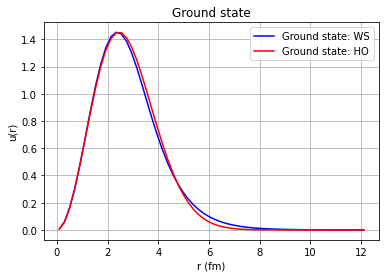

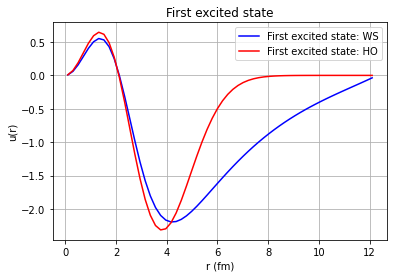

WS Bound State Energies (MeV):
[-31.11844754  -4.06723022]
HO Energies (MeV):
[20.68680495 48.18954987]


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N_r = 60
r_max = 12.0
h = r_max / (N_r - 1)
r = h / 2 + h * np.arange(N_r)

# Woods-Saxon Potential
N = 8
Z = 8
A = N + Z
a = 0.67
hsq2m = 20.73
V0 = 51.0
l = 0

# Constants
m = 938.92  # Proton mass in MeV/c^2

# Woods-Saxon Potential Function
def V_WS(r):
    R_ws = 1.27 * A**(1 / 3)
    V_ws = -V0 - 33.0 * (N - Z) / A  # Plus for neutrons, minus for protons
    return V_ws / (1 + np.exp((r - R_ws) / a))

def centrifugal(r, l):
    return hsq2m * l * (l + 1) / r**2

# Effective potential matrix for Woods-Saxon
V_eff = np.zeros((N_r, N_r))
for i in range(N_r):
    V_eff[i, i] = V_WS(r[i]) + centrifugal(r[i], l)

# Kinetic energy matrix
T = np.zeros((N_r, N_r))
for i in range(N_r):
    for j in range(N_r):
        if i == j:
            T[i, j] = -2.0
        elif abs(i - j) == 1:
            T[i, j] = 1.0
T[0, 0] = -3.0 if l % 2 == 0 else -1.0
T[0, 1] = 1.0
T = (-hsq2m / h**2) * T

# Hamiltonian for Woods-Saxon
H = T + V_eff
E, psi = np.linalg.eigh(H)

# Keep only bound states
E = E[E < 0]
psi = psi[:, :len(E)]

# Normalize eigenfunctions and enforce sign convention
for i in range(len(E)):
    psi[:, i] /= np.sqrt(h * np.sum(psi[:, i]**2))  # Normalize
    if psi[0, i] < 0:  # Enforce positive sign at the first grid point
        psi[:, i] *= -1

# Transition to u(r)
u = np.zeros((N_r, len(E)))
for i in range(len(E)):
    u[:, i] = r * psi[:, i]

# Harmonic Oscillator Potential Function
def V_HO(r, omega):
    return 0.5 * m * omega**2 * r**2

# Omega for the Harmonic Oscillator
omega = 0.07

# Effective potential matrix for Harmonic Oscillator
V_eff_HO = np.zeros((N_r, N_r))
for i in range(N_r):
    V_eff_HO[i, i] = V_HO(r[i], omega) + centrifugal(r[i], l)

# Hamiltonian for Harmonic Oscillator
H_HO = T + V_eff_HO
E_HO, psi_HO = np.linalg.eigh(H_HO)

# Normalize eigenfunctions and enforce sign convention for HO
for i in range(len(E_HO)):
    psi_HO[:, i] /= np.sqrt(h * np.sum(psi_HO[:, i]**2))  # Normalize
    if psi_HO[0, i] < 0:  # Enforce positive sign at the first grid point
        psi_HO[:, i] *= -1

# Transition to u(r) for Harmonic Oscillator
u_HO = np.zeros((N_r, len(E_HO)))
for i in range(len(E_HO)):
    u_HO[:, i] = r * psi_HO[:, i]

# Plot Ground State
plt.figure()
plt.plot(r, u[:, 0], label="Ground state: WS", color="blue")
plt.plot(r, u_HO[:, 0], label="Ground state: HO", color="red")
plt.xlabel("r (fm)")
plt.ylabel("u(r)")
plt.title("Ground state")
plt.legend()
plt.grid()
plt.show()

# Plot First Excited State
plt.figure()
plt.plot(r, u[:, 1], label="First excited state: WS", color="blue")
plt.plot(r, u_HO[:, 1], label="First excited state: HO", color="red")
plt.xlabel("r (fm)")
plt.ylabel("u(r)")
plt.title("First excited state")
plt.legend()
plt.grid()
plt.show()

# Print Energies for Reference
print("WS Bound State Energies (MeV):")
print(E)
print("HO Energies (MeV):")
print(E_HO[:len(E)])  # Print only as many states as WS for comparison


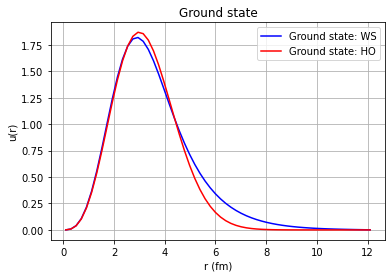

WS Bound State Energies (MeV):
[-16.92175401]
HO Energies (MeV):
[34.48996419]


In [21]:
#l = 1


import numpy as np
import matplotlib.pyplot as plt

# Parameters
N_r = 60
r_max = 12.0
h = r_max / (N_r - 1)
r = h / 2 + h * np.arange(N_r)

# Woods-Saxon Potential
N = 8
Z = 8
A = N + Z
a = 0.67
hsq2m = 20.73
V0 = 51.0
l = 1

# Constants
m = 938.92  # Proton mass in MeV/c^2

# Woods-Saxon Potential Function
def V_WS(r):
    R_ws = 1.27 * A**(1 / 3)
    V_ws = -V0 - 33.0 * (N - Z) / A  # Plus for neutrons, minus for protons
    return V_ws / (1 + np.exp((r - R_ws) / a))

def centrifugal(r, l):
    return hsq2m * l * (l + 1) / r**2

# Effective potential matrix for Woods-Saxon
V_eff = np.zeros((N_r, N_r))
for i in range(N_r):
    V_eff[i, i] = V_WS(r[i]) + centrifugal(r[i], l)

# Kinetic energy matrix
T = np.zeros((N_r, N_r))
for i in range(N_r):
    for j in range(N_r):
        if i == j:
            T[i, j] = -2.0
        elif abs(i - j) == 1:
            T[i, j] = 1.0
T[0, 0] = -3.0 if l % 2 == 0 else -1.0
T[0, 1] = 1.0
T = (-hsq2m / h**2) * T

# Hamiltonian for Woods-Saxon
H = T + V_eff
E, psi = np.linalg.eigh(H)

# Keep only bound states
E = E[E < 0]
psi = psi[:, :len(E)]

# Normalize eigenfunctions and enforce sign convention
for i in range(len(E)):
    psi[:, i] /= np.sqrt(h * np.sum(psi[:, i]**2))  # Normalize
    if psi[0, i] < 0:  # Enforce positive sign at the first grid point
        psi[:, i] *= -1

# Transition to u(r)
u = np.zeros((N_r, len(E)))
for i in range(len(E)):
    u[:, i] = r * psi[:, i]

# Harmonic Oscillator Potential Function
def V_HO(r, omega):
    return 0.5 * m * omega**2 * r**2

# Omega for the Harmonic Oscillator
omega = 0.07

# Effective potential matrix for Harmonic Oscillator
V_eff_HO = np.zeros((N_r, N_r))
for i in range(N_r):
    V_eff_HO[i, i] = V_HO(r[i], omega) + centrifugal(r[i], l)

# Hamiltonian for Harmonic Oscillator
H_HO = T + V_eff_HO
E_HO, psi_HO = np.linalg.eigh(H_HO)

# Normalize eigenfunctions and enforce sign convention for HO
for i in range(len(E_HO)):
    psi_HO[:, i] /= np.sqrt(h * np.sum(psi_HO[:, i]**2))  # Normalize
    if psi_HO[0, i] < 0:  # Enforce positive sign at the first grid point
        psi_HO[:, i] *= -1

# Transition to u(r) for Harmonic Oscillator
u_HO = np.zeros((N_r, len(E_HO)))
for i in range(len(E_HO)):
    u_HO[:, i] = r * psi_HO[:, i]

# Plot Ground State
plt.figure()
plt.plot(r, u[:, 0], label="Ground state: WS", color="blue")
plt.plot(r, u_HO[:, 0], label="Ground state: HO", color="red")
plt.xlabel("r (fm)")
plt.ylabel("u(r)")
plt.title("Ground state")
plt.legend()
plt.grid()
plt.show()

# Print Energies for Reference
print("WS Bound State Energies (MeV):")
print(E)
print("HO Energies (MeV):")
print(E_HO[:len(E)])  # Print only as many states as WS for comparison

